In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mltools as ml

data = np.genfromtxt("./data/curve80.txt",delimiter=None) # load the text file
X    = data[:,0]
X    = np.atleast_2d(X).T # code expects shanpe (M,N) so make sure it's 2d
Y    = data[:,1]
Xtr,Xte,Ytr,Yte = ml.splitData(X,Y,0.75)

# Problem 1

## Part (1)

In [2]:
print("Xtr shape is: {}".format(Xtr.shape))
print("Xte shape is: {}".format(Xte.shape))
print("Ytr shape is: {}".format(Ytr.shape))
print("Yte shape is: {}".format(Yte.shape))

Xtr shape is: (60, 1)
Xte shape is: (20, 1)
Ytr shape is: (60,)
Yte shape is: (20,)


## Part(2a)

In [3]:
lr = ml.linear.linearRegress(Xtr,Ytr)
xs = np.linspace(0,10,200) # densely sample possible x-values
xs = xs[:,np.newaxis] # force "xs" to be an M*1 matrix (expected by our code)
ys = lr.predict(xs) # make prediction at xs

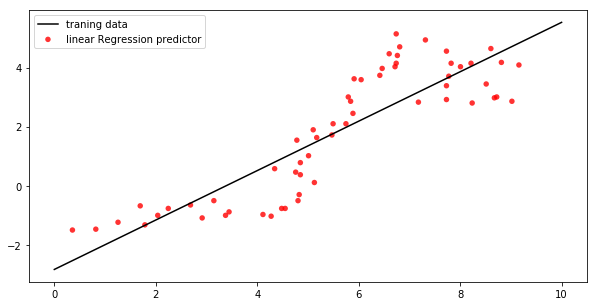

In [4]:
plt.figure(figsize=(10,5))
plt.scatter(Xtr, Ytr, alpha=0.8, c='red', edgecolors='none', s=30)
plt.plot(xs,ys,c ='black')
plt.legend(['traning data','linear Regression predictor'])

## Part(2b)

In [5]:
print(lr.theta)

[[-2.82765049  0.83606916]]


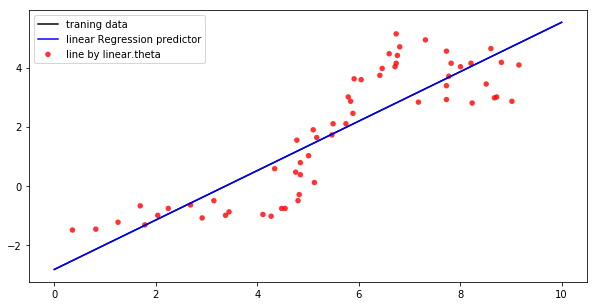

In [6]:
plt.figure(figsize=(10,5))
plt.scatter(Xtr, Ytr, alpha=0.8, c='red', edgecolors='none', s=30)
plt.plot(xs,ys,c ='black')

ysl = lr.theta[0][1]*xs+lr.theta[0][0]
plt.plot(xs,ysl,c ='blue')
plt.legend(['traning data','linear Regression predictor','line by linear.theta'])

Yes. The line created by from linear.theta is agree with our predictor

## Part(2c)

In [7]:
e = Ytr[:,np.newaxis] -lr.theta[0][1]*Xtr-lr.theta[0][0]
J = np.mean(e**2) # e.T.dot(e)/m
e2 = Yte[:,np.newaxis]-lr.theta[0][1]*Xte-lr.theta[0][0]
J2 = np.mean(e2**2)
print('the mean squared error of the predictions on training data is {}'.format(J))
print('the mean squared error of the predictions on test     data is {}'.format(J2))

the mean squared error of the predictions on training data is 1.127711955609391
the mean squared error of the predictions on test     data is 2.242349203010125


## Part 3

In [8]:
Xtr2 = np.zeros((Xtr.shape[0],2))  # M by 2 matrix
Xtr2[:,0] = Xtr[:,0] # place original x feature as x1
Xtr2[:,1] = Xtr[:,0]**2 # place x^e feature as x2

# Create polynomial features up to "degree; don't create constant feature"
# (the linear regression learner will add the constant feature automatically)
XtrP = ml.transforms.fpoly(Xtr,2,bias=False)

# Rescale the data matrix so that the features have similar ranges / vaiance
XtrP,params = ml.transforms.rescale(XtrP)
# 'params' returns the transformation parameters (shift & scale)

# Then we can train the model on the scaled feature matrix:
lr = ml.linear.linearRegress(XtrP,Ytr) # create the trian model

# Now, apply the same polynomial expansion & scaling transformation to Xtest:
XteP,_ = ml.transforms.rescale(ml.transforms.fpoly(Xte,2,bias=False),params)



## Part(3a) 

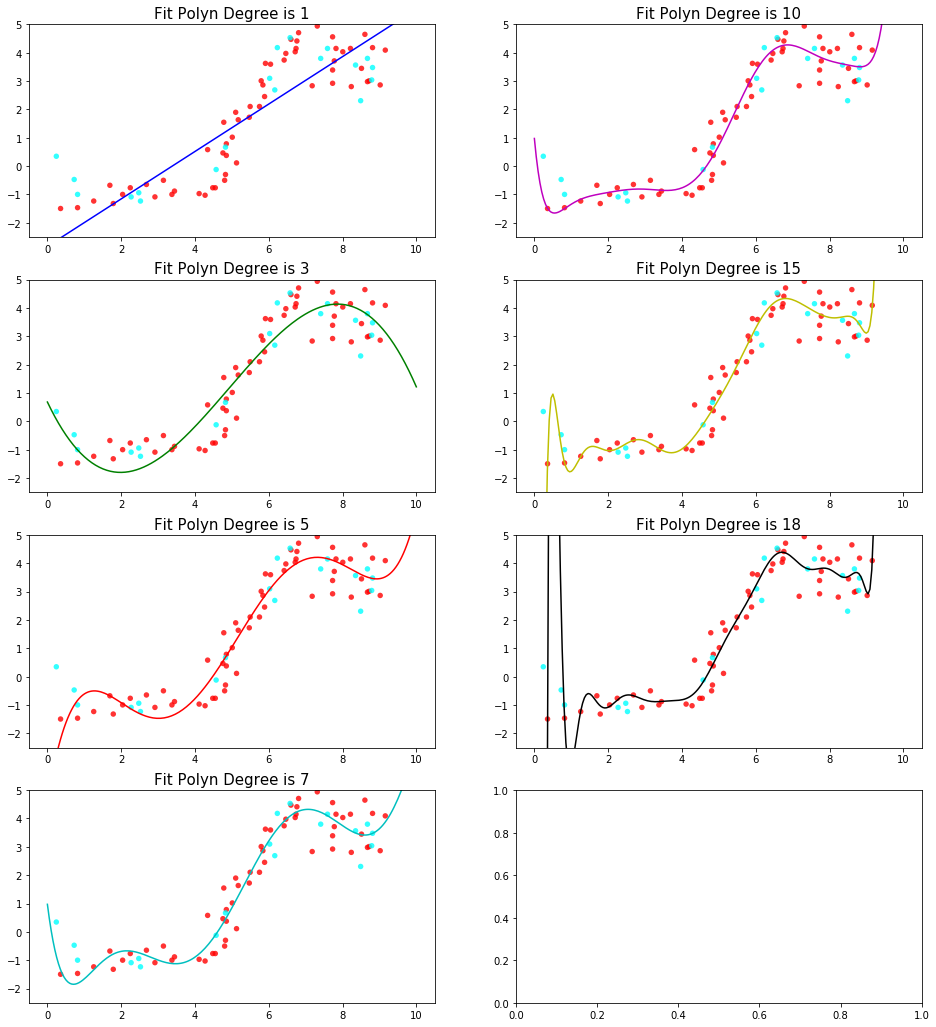

In [9]:
def get_preict_degree(Xtr,Ytr,degree):
    XtrP = ml.transforms.fpoly(Xtr,degree,bias=False)
    XtrP,params = ml.transforms.rescale(XtrP)
    lr = ml.linear.linearRegress(XtrP,Ytr)
    xs = np.linspace(0,10,200) # densely sample possible x-values
    xs = xs[:,np.newaxis] # force "xs" to be an M*1 matrix (expected by our code)
    xsP,_ = ml.transforms.rescale(ml.transforms.fpoly(xs,degree,bias=False),params)
    ys = lr.predict(xsP) # make prediction at xs
    return xs,ys
    
# plot the data       
color_list = ['b','g','r','c','m','y','k','b','g','r','c','m','y','k','b','g','r','c','m','y','k','b','g','r','c','m','y']

degree_lst = [1,3,5,7,10,15,18]
fig,ax = plt.subplots(4,2,figsize=(16,18))

for i,degree in enumerate(degree_lst):
    xs,ys=get_preict_degree(Xtr,Ytr,degree)
    a = int(i%4)
    b = int((i<4) == False)
    ax[a][b].plot(xs,ys,c=color_list[i])
    ax[a][b].scatter(Xtr, Ytr, alpha=0.8, c='red', edgecolors='none', s=30)
    ax[a][b].scatter(Xte, Yte, alpha=0.8, c='cyan', edgecolors='none', s=30)
    ax[a][b].set_ylim((-2.5,5.0))
    ax[a][b].set_title('Fit Polyn Degree is {}'.format(degree),fontsize=15)
plt.show()

## Part(3b) 

In [10]:
def get_error_degree(Xtr,Ytr,Xte,Yte,degree):
    XtrP = ml.transforms.fpoly(Xtr,degree,bias=False)
    XtrP,params = ml.transforms.rescale(XtrP)
    lr   = ml.linear.linearRegress(XtrP,Ytr)
    XteP,_ = ml.transforms.rescale(ml.transforms.fpoly(Xte,degree,bias=False),params)
    XtrP1 = np.append(np.ones((XtrP.shape[0],1)),XtrP,axis=1)
    XteP1 = np.append(np.ones((XteP.shape[0],1)),XteP,axis=1)
    e = Ytr[:,np.newaxis] -np.matmul(XtrP1,lr.theta[0][:,np.newaxis])
    J = np.mean(e**2) # e.T.dot(e)/m
    e2 = Yte[:,np.newaxis]-np.matmul(XteP1,lr.theta[0][:,np.newaxis])
    J2 = np.mean(e2**2)
    return J,J2

Text(0.5,0,'degree')

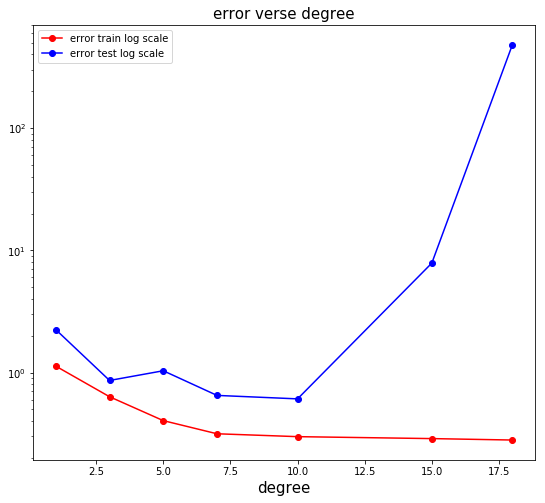

In [11]:
logerrTrain = [None]*len(degree_lst);
logerrTest  = [None]*len(degree_lst);
for i,degree in enumerate(degree_lst):
    logerrTrain[i],logerrTest[i] = get_error_degree(Xtr,Ytr,Xte,Yte,degree)
fig,ax = plt.subplots(1,1,figsize=(9,8))
ax.semilogy(degree_lst,logerrTrain,'ro-')
ax.semilogy(degree_lst,logerrTest, 'bo-')
ax.legend(['error train log scale','error test log scale'])
ax.set_title('error verse degree',fontsize=15)
plt.xlabel('degree',fontsize=15)


## Part(3c)

Based on the validation error, I will choose degree 10 when the test error is lowest.

## Part(4)

In [23]:
def get_fourier(Xtr,Ytr,Xte,Yte,feature_number):
    
    XtrF = np.zeros((Xtr.shape[0],feature_number))
    XteF = np.zeros((Xte.shape[0],feature_number))
    XtrF[:,0] = 0*Xtr[:,0]+1
    XteF[:,0] = 0*Xte[:,0]+1
    n  = int((feature_number-1)/2)
    for i in range(n):
        XtrF[:,int(2*i+1)] = np.sin((i+1)*Xtr[:,0]/2)
        XtrF[:,int(2*i+2)] = np.cos((i+1)*Xtr[:,0]/2)
        XteF[:,int(2*i+1)] = np.sin((i+1)*Xte[:,0]/2)
        XteF[:,int(2*i+2)] = np.cos((i+1)*Xte[:,0]/2)
        
    # XtrF,params = ml.transforms.rescale(XtrF)
    # XteF,_ = ml.transforms.rescale(XteF,params)
    return XtrF,XteF

def get_xs(xs,feature_number):
    n  = int((feature_number-1)/2)
    XsP = np.zeros((xs.shape[0],feature_number))
    XsP[:,0] = 0*xs[:,0]+1
    for i in range(n):
        XsP[:,int(2*i+1)] = np.sin((i+1)*xs[:,0]/2)
        XsP[:,int(2*i+2)] = np.cos((i+1)*xs[:,0]/2)
    return XsP
def get_error(Xtr,Ytr,Xte,Yte,degree):
    
    XtrF,XteF = get_fourier(Xtr,Ytr,Xte,Yte,degree)
    lr = ml.linear.linearRegress(XtrF[:,1:],Ytr)
    e = Ytr[:,np.newaxis] -np.matmul(XtrF,lr.theta[0][:,np.newaxis])
    J = np.mean(e**2) # e.T.dot(e)/m
    e2 = Yte[:,np.newaxis]-np.matmul(XteF,lr.theta[0][:,np.newaxis])
    J2 = np.mean(e2**2)
    return J,J2

In [24]:
def get_preict_fourier(Xtr,Ytr,Xte,Yte,feature_number):
    
    XtrF,XteF = get_fourier(Xtr,Ytr,Xte,Yte,feature_number)
    lr = ml.linear.linearRegress(XtrF,Ytr)
    xs = np.linspace(0,10,200) # densely sample possible x-values
    xs = xs[:,np.newaxis] # force "xs" to be an M*1 matrix (expected by our code)
    xsP= get_xs(xs,feature_number)
    ys = lr.predict(xsP) # make prediction at xs
    return xs,ys

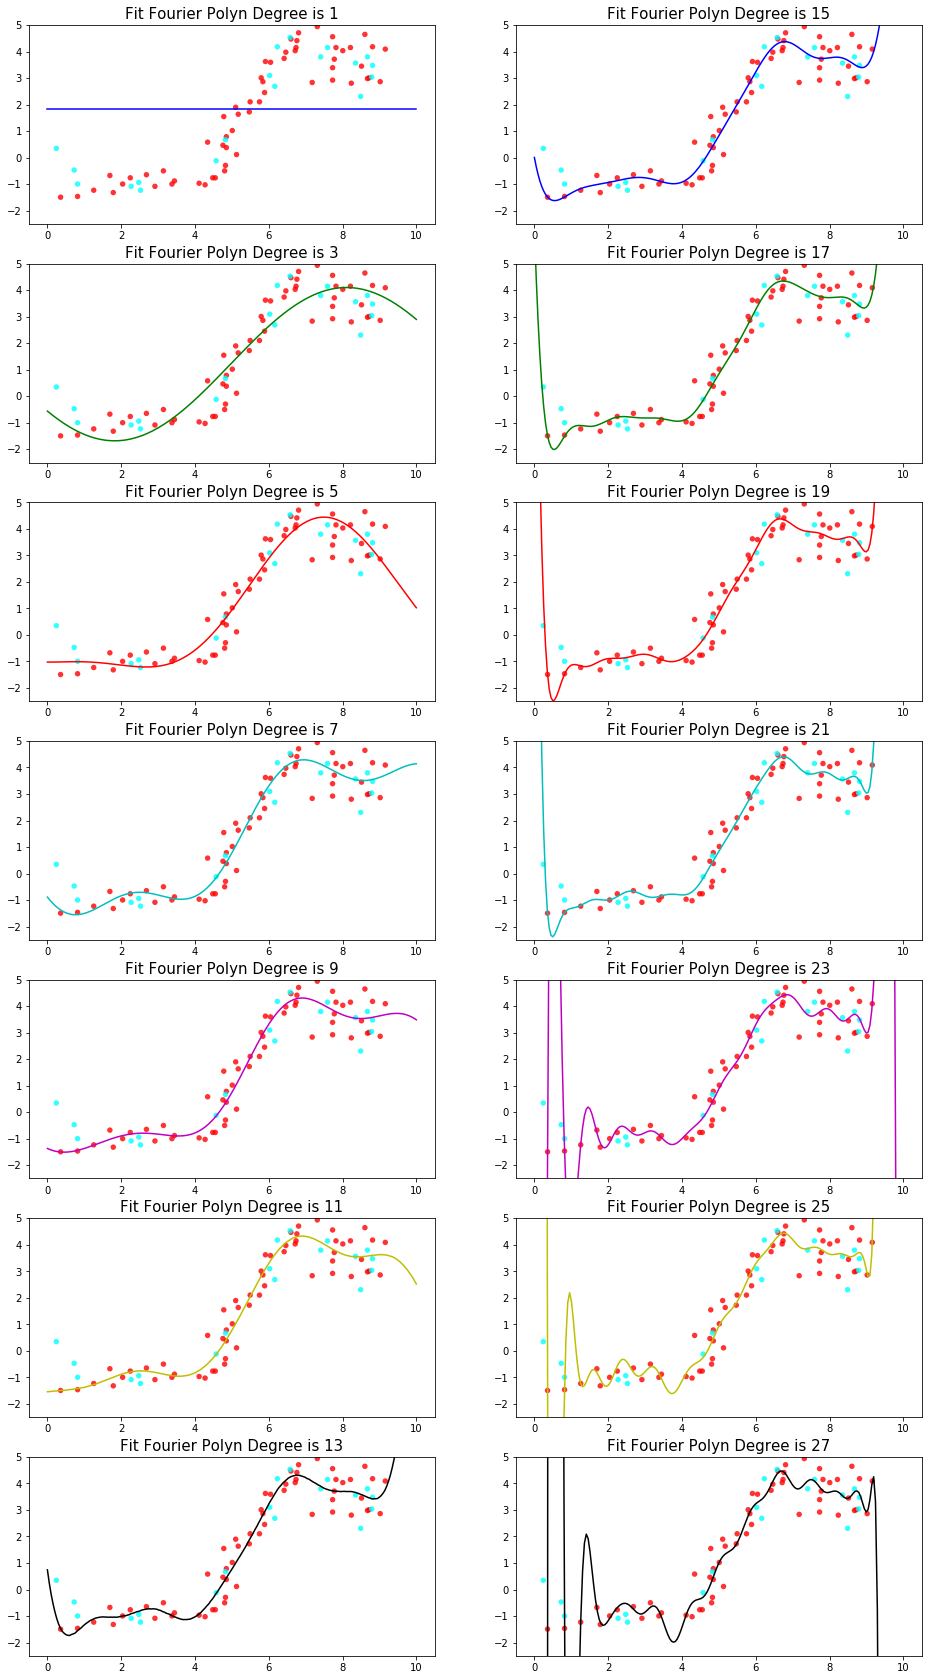

In [25]:
fig,ax = plt.subplots(7,2,figsize=(16,30))
degree_lst2 = np.arange(1,29,2).tolist()
for i,degree in enumerate(degree_lst2):
    xs,ys=get_preict_fourier(Xtr,Ytr,Xte,Yte,degree)
    a = int(i%7)
    b = int((i<7) == False)
    ax[a][b].plot(xs,ys,c=color_list[i])
    ax[a][b].scatter(Xtr, Ytr, alpha=0.8, c='red', edgecolors='none', s=30)
    ax[a][b].scatter(Xte, Yte, alpha=0.8, c='cyan', edgecolors='none', s=30)
    ax[a][b].set_ylim((-2.5,5.0))
    ax[a][b].set_title('Fit Fourier Polyn Degree is {}'.format(degree),fontsize=15)
plt.show()


Text(0.5,0,'Feature number use in Fourier')

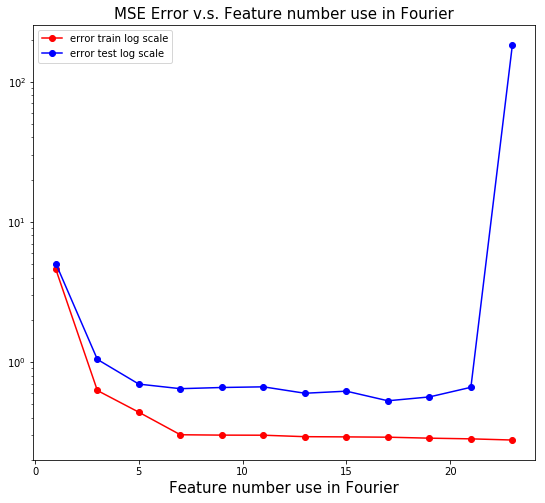

In [26]:
degree_lst2 = np.arange(1,25,2).tolist()
errTrain_lst = [None]*len(degree_lst2);
errTest_lst  = [None]*len(degree_lst2);
for i,degree in enumerate(degree_lst2):
    errTrain_lst[i],errTest_lst[i] = get_error(Xtr,Ytr,Xte,Yte,degree)
fig,ax = plt.subplots(1,1,figsize=(9,8))
ax.semilogy(degree_lst2,errTrain_lst,'ro-')
ax.semilogy(degree_lst2,errTest_lst, 'bo-')
ax.legend(['error train log scale','error test log scale'])
ax.set_title('MSE Error v.s. Feature number use in Fourier',fontsize=15)
plt.xlabel('Feature number use in Fourier',fontsize=15)

# Problem 2

In [43]:
nFolds = 5
degree_lst = [1,3,5,7,10,15,18]  
coserrTrain = [None]*len(degree_lst);
csoerrTest  = [None]*len(degree_lst);

## part (1) 

Text(0.5,0,'degree')

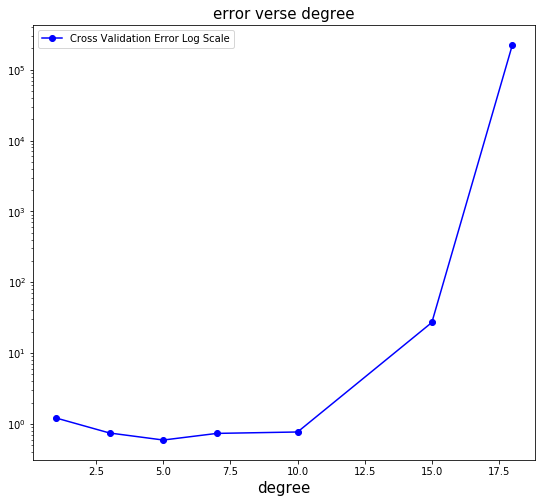

In [44]:
def cross_validation_error(degree,nFolds):
    coserrTrain = [None]*nFolds;
    csoerrValid  = [None]*nFolds;
    for iFold in range(nFolds):
    # use ith block as validation
        Xti,Xvi,Yti,Yvi = ml.crossValidate(Xtr,Ytr,nFolds,iFold) 
        _,csoerrValid[iFold] = get_error_degree(Xti,Yti,Xvi,Yvi,degree) 
    J_degree = np.mean(csoerrValid)
    return J_degree

J = [None]*len(degree_lst);
for i,degree in enumerate(degree_lst):
    J[i] = cross_validation_error(degree,nFolds)
    
fig,ax = plt.subplots(1,1,figsize=(9,8))
# ax.semilogy(degree_lst,logerrTrain,'ro-')
ax.semilogy(degree_lst,J, 'bo-')
ax.legend(['Cross Validation Error Log Scale','error test log scale'])
ax.set_title('error verse degree',fontsize=15)
plt.xlabel('degree',fontsize=15)

## Part(2)

Text(0.5,0,'degree')

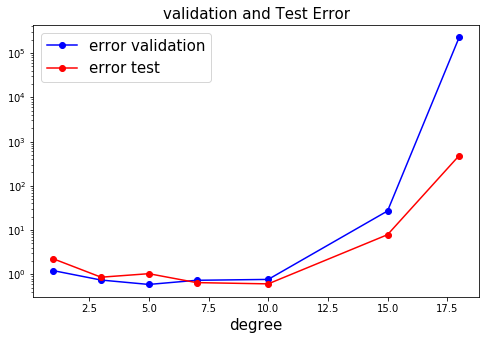

In [52]:
fig,ax = plt.subplots(1,1,figsize=(8,5))
# ax.semilogy(degree_lst,logerrTrain,'ro-')
ax.semilogy(degree_lst,J, 'bo-')
ax.semilogy(degree_lst,logerrTest, 'ro-')
ax.legend(['error validation','error test'],fontsize=15)
ax.set_title('validation and Test Error',fontsize=15)
plt.xlabel('degree',fontsize=15)

Vadidation errot says that degree 5 is the best to choose, also degree 1,3,7,10 are also good with a little bit more the degree 5. However, test data tells that degree 5 is not good to choose compared to degree 7,10 where degree 10 is the best to choose.

## Part(3)

Based on cross validation error I will choose degree 5 since it has the least cross validation error.

## Part(4)

Text(0.5,0,'Fold number')

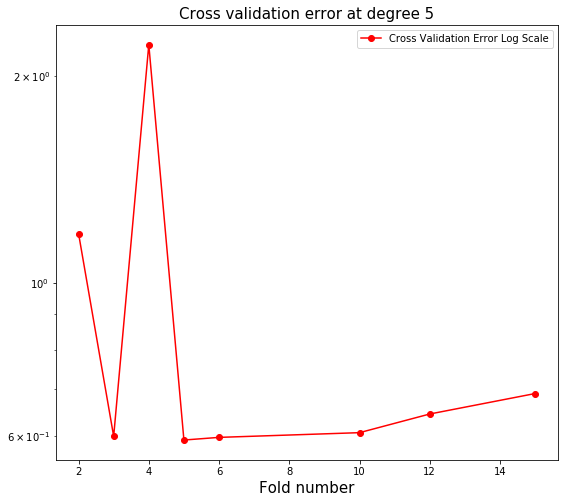

In [56]:
nFolds_lst = [2,3,4,5,6,10,12,15]
JF = [None]*len(nFolds_lst);
for i,Fold in enumerate(nFolds_lst):
    JF[i] = cross_validation_error(5,Fold)
fig,ax = plt.subplots(1,1,figsize=(9,8))
ax.semilogy(nFolds_lst,JF, 'ro-')
ax.legend(['Cross Validation Error Log Scale','error test log scale'])
ax.set_title('Cross validation error at degree 5',fontsize=15)
plt.xlabel('Fold number',fontsize=15)